# Импорт пакетов, загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
import plotly.graph_objects as go

%matplotlib inline 

import plotly.io as pio
pio.renderers.default='notebook'

In [4]:
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
                 header=None)
data.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

In [5]:
names=['Sex','Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data.columns=names
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# Снижение размерности методом МГК

* Применить МГК ко всей выборке (кроме ПОЛ и КОЛЬЦА), проанализировать ГК, 
построить визуализацию для 2х ГК
* Сделать тоже самое для каждого пола по отдельности.

In [6]:
from sklearn.decomposition import PCA

## Все данные

In [7]:
pca = PCA()
inputData = data.drop(columns=['Sex', 'Rings']).copy()
pca.fit(inputData)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.explained_variance_ratio_*100)

[9.74100729e+01 1.14183886e+00 8.37567021e-01 3.03865180e-01
 1.41047670e-01 1.22936128e-01 4.26722250e-02]


In [9]:
pcaData=pd.DataFrame(pca.transform(inputData))
pcaNames=[]
for i in range(7):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0 -0.372971  0.001403 -0.011350  0.008450 -0.024625  0.000289  0.011944
1 -0.726930  0.029870  0.034633  0.001536  0.001160 -0.001425  0.000299
2 -0.177005 -0.059590 -0.032161 -0.002284 -0.009204  0.011687  0.005254
3 -0.372241 -0.006486  0.001433 -0.001567  0.007012  0.003766  0.019973
4 -0.759040  0.042558  0.045769  0.000179 -0.006274  0.003610  0.005563

In [10]:
# объеденить inputData+pcaData

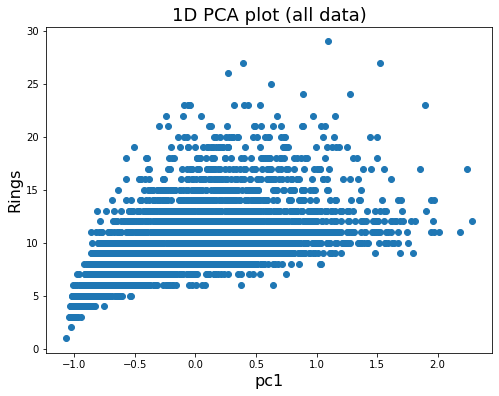

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(pcaData['pc1'].values, data['Rings'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('Rings', fontsize=16)
ax.set_title('1D PCA plot (all data)', fontsize=18)
plt.show()

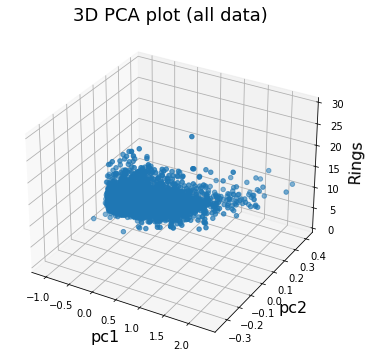

In [12]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.scatter(pcaData['pc1'], pcaData['pc2'], data['Rings'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('Rings', fontsize=16)
ax.set_title('3D PCA plot (all data)', fontsize=18)
plt.show()

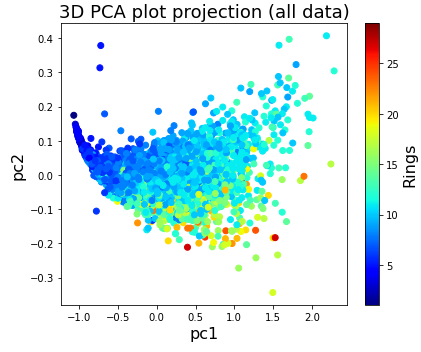

In [13]:
fig, ax = plt.subplots(figsize=(6,5))
scatterPlot1 = ax.scatter(pcaData['pc1'], pcaData['pc2'], c=data['Rings'],cmap=cm.jet)
cbar = fig.colorbar(scatterPlot1, ax=ax)
cbar.set_label('Rings', fontsize=16)
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_title('3D PCA plot projection (all data)', fontsize=18)
plt.tight_layout()
plt.show()

In [14]:
fig = go.Figure()
fig.add_traces(
    go.Scatter3d(
        x=pcaData['pc1'], y=pcaData['pc2'], z=data['Rings'],
        mode='markers', 
        marker=dict(size=5, color=data['Rings'], line=dict(color='black',width=1),
        colorscale='Jet')        
    )
)
fig.update_layout(
    width=600, 
    height=600,
    xaxis=dict(range=[pcaData['pc1'].min(),pcaData['pc1'].max()]),
    yaxis=dict(range=[pcaData['pc2'].min(),pcaData['pc2'].max()]),
    scene=dict(
            xaxis=dict(title='pc1', range=[pcaData['pc1'].min(),pcaData['pc1'].max()]),
            yaxis=dict(title='pc1', range=[pcaData['pc2'].min(),pcaData['pc2'].max()]),
            zaxis=dict(title='Rings',)
    ),
    title=dict(
        text='3D PCA plot (all data)',
        font=dict(size=18),
    ),
    title_x=0.5
)
fig.show()

## МГК для sex=M

In [15]:
inputDataM = data[data['Sex']=='M'].drop(columns=['Sex','Rings']).copy()

In [16]:
pcaM = PCA()
pcaM.fit(inputDataM)
print(pcaM.explained_variance_ratio_*100)

[9.69826455e+01 1.50266164e+00 7.82611235e-01 4.32668924e-01
 1.65367303e-01 8.86720377e-02 4.53733654e-02]


In [17]:
pcaDataM=pd.DataFrame(pca.transform(inputDataM))
pcaDataM.columns=pcaNames
pcaDataM.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0 -0.372971  0.001403 -0.011350  0.008450 -0.024625  0.000289  0.011944
1 -0.726930  0.029870  0.034633  0.001536  0.001160 -0.001425  0.000299
2 -0.372241 -0.006486  0.001433 -0.001567  0.007012  0.003766  0.019973
3 -0.367777 -0.024609 -0.023334  0.004735  0.003466 -0.003487  0.001839
4 -0.498578 -0.017205 -0.008239  0.010276 -0.003012  0.001335  0.014803

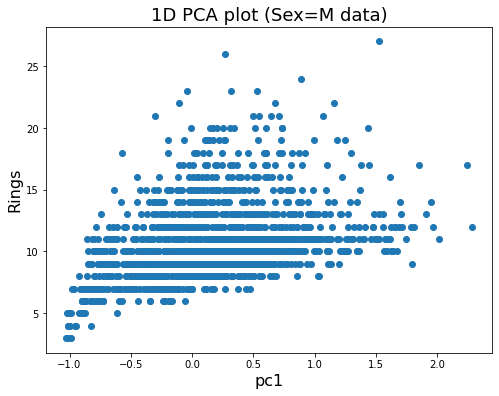

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(pcaDataM['pc1'].values, data[data['Sex']=='M']['Rings'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('Rings', fontsize=16)
ax.set_title('1D PCA plot (Sex=M data)', fontsize=18)
plt.show()

## МГК для sex=F

In [19]:
inputDataF = data[data['Sex']=='F'].drop(columns=['Sex','Rings']).copy()

In [20]:
pcaF = PCA()
pcaF.fit(inputDataF)
print(pcaF.explained_variance_ratio_*100)

[9.63511832e+01 1.89069816e+00 5.65466039e-01 5.19808504e-01
 3.88230760e-01 2.21530073e-01 6.30832803e-02]


In [21]:
pcaDataF=pd.DataFrame(pca.transform(inputDataF))
pcaDataF.columns=pcaNames
pcaDataF.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0 -0.177005 -0.059590 -0.032161 -0.002284 -0.009204  0.011687  0.005254
1 -0.072082 -0.137085  0.044154  0.040805  0.001059 -0.003806 -0.004236
2 -0.070401 -0.066133 -0.012262  0.018890 -0.022000 -0.000343 -0.001163
3  0.062631 -0.094745  0.025850  0.040437 -0.010363  0.017173  0.003790
4 -0.265615 -0.088476 -0.009824 -0.020455  0.002125  0.001452 -0.023280

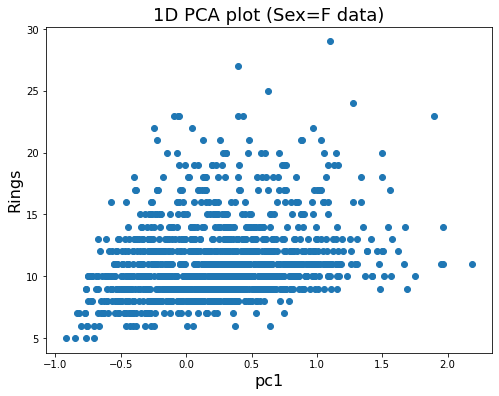

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(pcaDataF['pc1'].values, data[data['Sex']=='F']['Rings'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('Rings', fontsize=16)
ax.set_title('1D PCA plot (Sex=F data)', fontsize=18)
plt.show()

## МГК для sex=I

In [23]:
inputDataI = data[data['Sex']=='I'].drop(columns=['Sex','Rings']).copy()

In [24]:
pcaI = PCA()
pcaI.fit(inputDataI)
print(pcaI.explained_variance_ratio_*100)

[9.67363232e+01 1.87597761e+00 8.01645387e-01 2.57688344e-01
 1.20491787e-01 1.14123279e-01 9.37503655e-02]


In [25]:
pcaDataI=pd.DataFrame(pca.transform(inputDataI))
pcaDataI.columns=pcaNames
pcaDataI.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0 -0.759040  0.042558  0.045769  0.000179 -0.006274  0.003610  0.005563
1 -0.568254 -0.007380  0.008828  0.001909 -0.010242 -0.007567 -0.020065
2 -0.662136 -0.003308  0.059691  0.022122 -0.012852  0.004541  0.006889
3 -0.722684 -0.006573  0.020293  0.001179  0.003926 -0.000005 -0.011698
4 -0.937499  0.084161  0.114472 -0.007310 -0.013366 -0.015676  0.001278

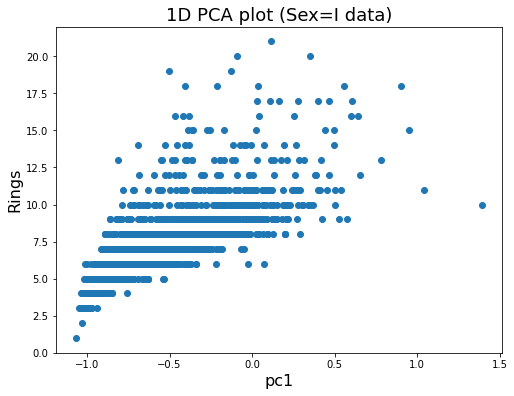

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(pcaDataI['pc1'].values, data[data['Sex']=='I']['Rings'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('Rings', fontsize=16)
ax.set_title('1D PCA plot (Sex=I data)', fontsize=18)
plt.show()